<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv"
df = pd.read_csv(url)
print(df.isnull().sum())

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64


In [ ]:
null_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print(null_cols)

[]


In [ ]:
#Quasi features
from sklearn.model_selection import train_test_split
label_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
                 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

x_train, x_test, y_train, y_test = train_test_split(
    df[['text']],            # features: only text
    df[label_columns],       # labels: all emotion columns
    test_size=0.3,
    random_state=0
)
constant_features = [
    feature for feature in y_test.columns if y_test[feature].std() == 0
]

In [ ]:
#Quasi constant features
from sklearn.model_selection import train_test_split
import pandas as pd

# Split first (using text and labels from GoEmotions)
label_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
                 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=label_columns),   # features: drop all label columns
    df[label_columns],                # labels
    test_size=0.3,
    random_state=0
)

quasi_constant_features = []

for col in x_train.columns:
    top_freq = x_train[col].value_counts(normalize=True).max()
    if top_freq > 0.99:      # appears in 99% of rows
        quasi_constant_features.append(col)

print("Quasi-constant features found:", quasi_constant_features)

# Drop from train & test
x_train.drop(columns=quasi_constant_features,axis=1,inplace=True)
x_test.drop(columns=quasi_constant_features,axis=1,inplace=True)

print("New shape (x_train):", x_train.shape)
print("New shape (x_test):", x_test.shape)
'''quasi_constant_features = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()
    if top_freq > 0.99:
        quasi_constant_features.append(col)

print("Quasi-Constant Features:", quasi_constant_features)

df = df.drop(columns=quasi_constant_features)
'''

Quasi-constant features found: []
New shape (x_train): (49000, 9)
New shape (x_test): (21000, 9)


In [ ]:
# Duplicate features
duplicate_features = []

# Iterate over columns
for i in range(len(x_train.columns)):
    col1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col2 = x_train.columns[j]

        # Check if both columns are identical
        if x_train[col1].equals(x_train[col2]):
            duplicate_features.append(col2)

print("Duplicate features found:", duplicate_features)

# Drop duplicates
x_train.drop(columns=duplicate_features, inplace=True)
x_test.drop(columns=duplicate_features, inplace=True)

print("New shape (x_train):", x_train.shape)
""" Drop duplicates directly
x_train_T = x_train.T           # transpose: columns become rows->fn of rows
x_train_T = x_train_T.drop_duplicates(keep='first')
x_train = x_train_T.T           # transpose back

# Apply same to x_test
x_test = x_test[x_train.columns]

print("Shape after duplicate feature removal:", x_train.shape)
"""

Duplicate features found: []
New shape (x_train): (49000, 9)


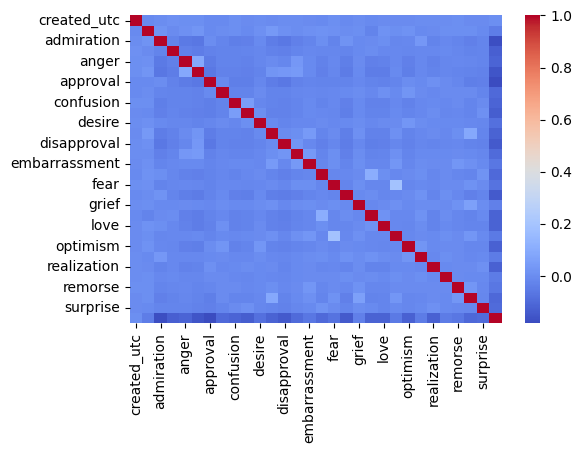

In [ ]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Number of correlated features: 0


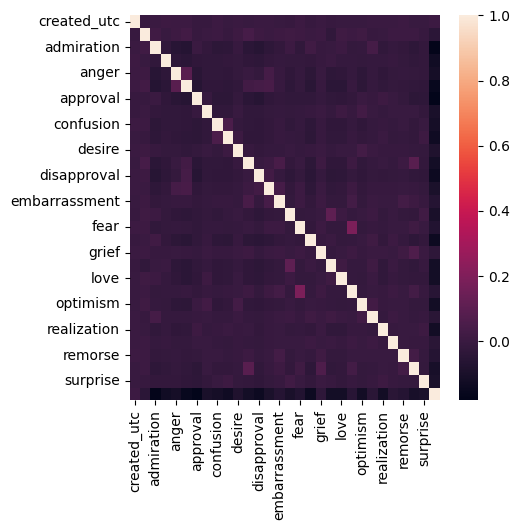

In [ ]:
# Keep only numeric columns for correlation
X = df.select_dtypes(include='number')
corrmat = X.corr()

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, 0.9)
correlated_features = set(corr_features)
print("Number of correlated features:", len(correlated_features))


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
url1 = '/content/drive/MyDrive/datasets/Santander Customer Satisfaction_train.csv'
url2 = '/content/drive/MyDrive/datasets/house_price_train.csv'
url3 = '/content/drive/MyDrive/datasets/titanic_train.csv'

# Read CSVs
df1 = pd.read_csv(url2)
df2 = pd.read_csv(url3)
df3 = pd.read_csv(url1)


In [25]:
# Show only columns with at least one NaN
null_columns = df1.columns[df1.isnull().any()]
print("Columns with NaN values:")
print(null_columns)


Columns with NaN values:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [28]:
fill_values = {}

# Numeric columns → mean
fill_values.update(df1.mean(numeric_only=True))#update method adds the column names (as keys) and their corresponding means to the fill_values dict

# Object/text columns → mode
fill_values.update({
    col: df1[col].mode(dropna=True)[0] #ignoring NaN values so dropna=True [0]->first of many modes
    for col in df1.select_dtypes(include='object').columns
    if not df1[col].mode(dropna=True).empty
})

df1.fillna(fill_values, inplace=True)


In [29]:
# Show only columns with at least one NaN
null_columns = df1.columns[df1.isnull().any()]
print("Columns with NaN values:")
print(null_columns)

Columns with NaN values:
Index([], dtype='object')


In [27]:
print(df1.tail(1))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1459         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1459      6   2008        WD         Normal     147500  

[1 rows x 81 columns]


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1.drop(columns="SalePrice"),df1["SalePrice"],test_size=0.3,random_state=0)

In [34]:
constant_features = [
    feature for feature in x_test if x_test[feature].nunique() == 1
]
print(constant_features)

['Utilities']


In [35]:
quasi_constant_features = []

for col in x_train.columns:
    top_freq = x_train[col].value_counts(normalize=True).max()
    if top_freq > 0.99:      # appears in 99% of rows
        quasi_constant_features.append(col)

print("Quasi-constant features found:", quasi_constant_features)

Quasi-constant features found: ['Street', 'Utilities', 'Condition2', 'PoolArea', 'PoolQC', 'MiscFeature']


In [36]:
duplicate_features = []

# Iterate over columns
for i in range(len(x_train.columns)):
    col1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col2 = x_train.columns[j]

        # Check if both columns are identical
        if x_train[col1].equals(x_train[col2]):
            duplicate_features.append(col2)

print("Duplicate features found:", duplicate_features)

Duplicate features found: []


Number of correlated features: 0


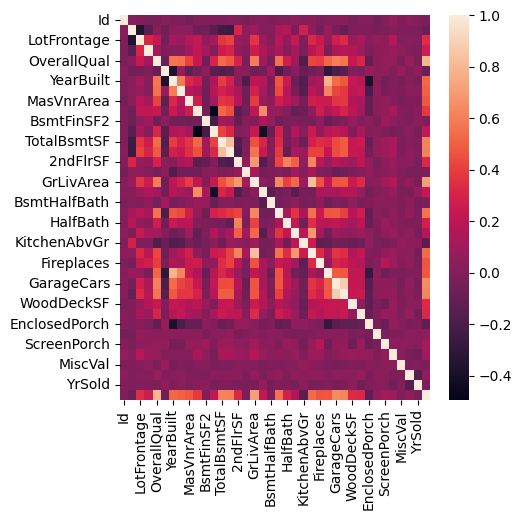

In [40]:
# Keep only numeric columns for correlation
import matplotlib.pyplot as plt
import seaborn as sns
X = df1.select_dtypes(include='number')
corrmat = X.corr()

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, 0.9)
correlated_features = set(corr_features)
print("Number of correlated features:", len(correlated_features))

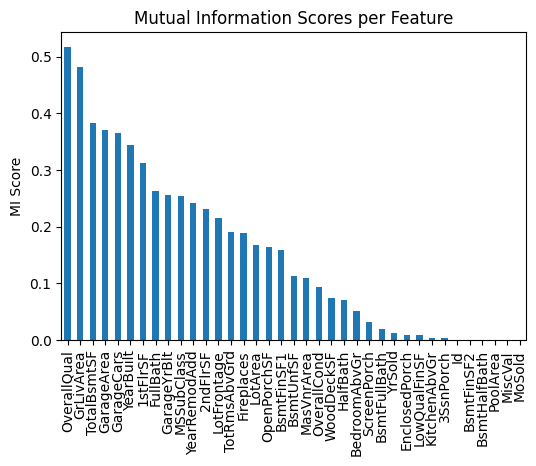

Top selected features: ['OverallQual']


In [42]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
import pandas as pd
import matplotlib.pyplot as plt
X_num = x_train.select_dtypes(include=['number'])

mi_scores = mutual_info_regression(X_num, y_train)

# 2. Convert to a pandas Series for readability
mi_series = pd.Series(mi_scores)
mi_series.index = X_num.columns  # Label each MI score with its corresponding feature

# 3. Sort the MI scores (highest first)
mi_series = mi_series.sort_values(ascending=False)

# 4. Visualize the scores using a bar chart
plt.figure(figsize=(6,4))
mi_series.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("MI Score")
plt.show()
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(mutual_info_regression, k=1)
selector.fit(X_num, y_train)

selected_features = X_num.columns[selector.get_support()]
print(f"Top selected features:", selected_features.tolist())

In [43]:
df1.head()
df1.columns
df1.dtypes


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


Significant features (p < 0.05):
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


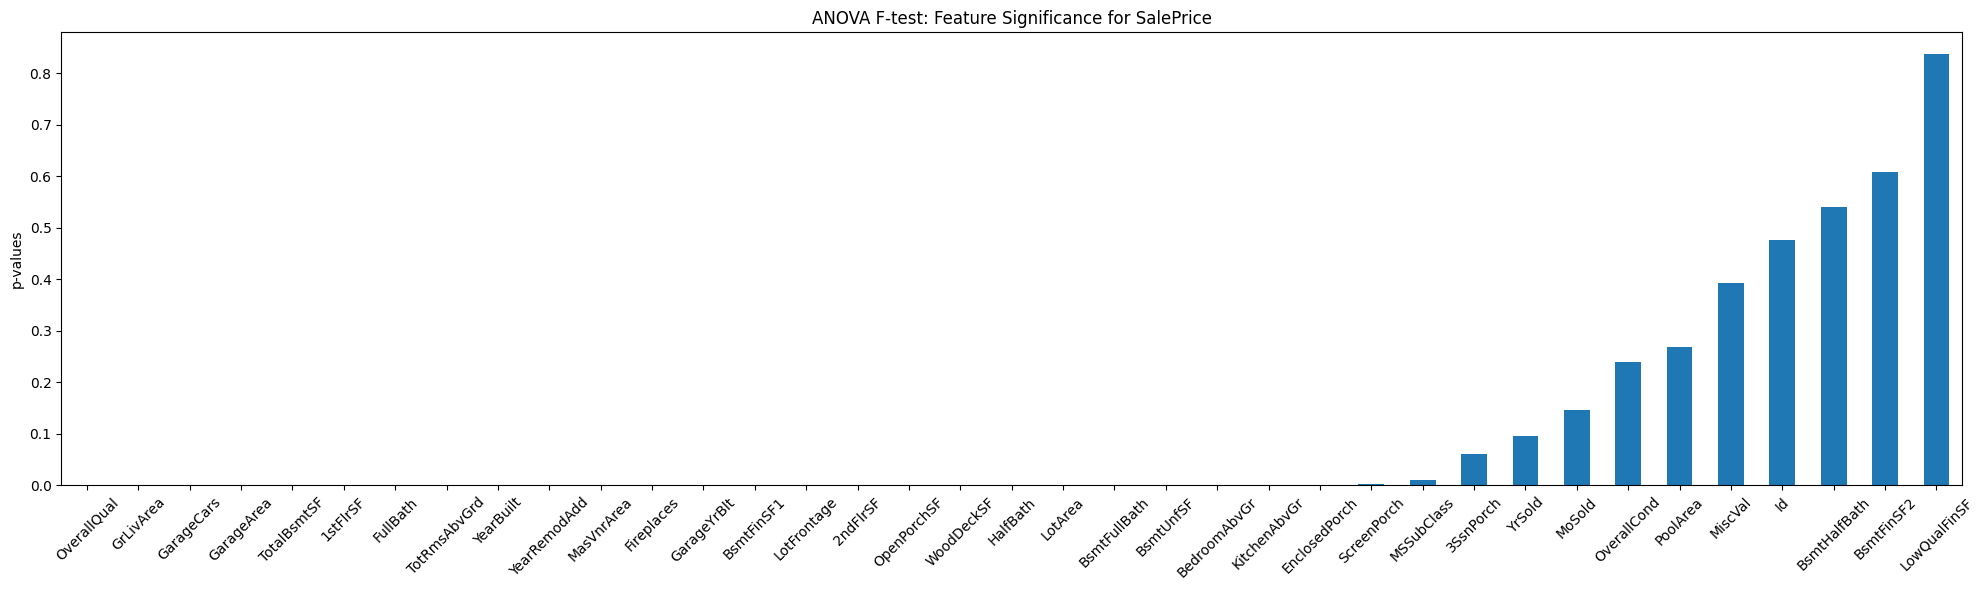

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression


# 2. Select only numeric features
x_train_numeric = x_train.select_dtypes(include=['number'])

# 3. Fill missing values with 0 (you can use mean instead if preferred)
x_train_filled = x_train_numeric.fillna(0)

# 4. Perform ANOVA F-test for regression
f_scores, p_values = f_regression(x_train_filled, y_train)

# 5. Create Series with p-values
univariate = pd.Series(p_values, index=x_train_filled.columns)

# 6. Filter features with p-value < 0.05
significant_features = univariate[univariate < 0.05]
print("Significant features (p < 0.05):")
print(significant_features.index.tolist())

# 7. Plot sorted p-values
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("ANOVA F-test: Feature Significance for SalePrice")
plt.tight_layout()
plt.show()
